In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import contextily as ctx

from sklearn.linear_model import LinearRegression

In [2]:
DATA_DIR = "../datasets_full"

In [3]:
vsb_activity = pd.read_csv(os.path.join(DATA_DIR, 'Vancouver', 'vancouver_small_business_by_region.csv'))

In [4]:
vsb_activity.head()

,year,region_code,value
0,2007,DR01,"79,200"
1,2008,DR01,"80,300"
2,2009,DR01,"82,400"
3,2010,DR01,"83,400"
4,2011,DR01,"77,500"


In [11]:
vsb_pivot = vsb_activity.pivot(index='year', columns='region_code', values='value')

In [20]:
vsb_pivot = vsb_pivot.replace({',': ''}, regex=True).astype('int32')

In [26]:
vsb_perc = vsb_pivot.pct_change().dropna()

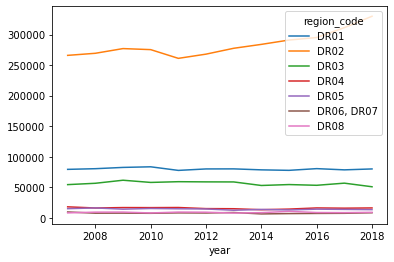

In [21]:
vsb_pivot.plot.line()

In [28]:
vsb_perc

region_code,DR01,DR02,DR03,DR04,DR05,"DR06, DR07",DR08
year,,,,,,,
2008,0.013889,0.012782,0.040590,-0.106742,0.081081,-0.212766,0.151899
2009,0.026152,0.028582,0.088652,0.044025,-0.125000,0.013514,0.010989
2010,0.012136,-0.006135,-0.058632,-0.006024,0.078571,-0.040000,-0.152174
2011,-0.070743,-0.051924,0.020761,0.012121,-0.033113,0.097222,0.179487
2012,0.030968,0.026427,-0.005085,-0.107784,-0.020548,-0.025316,-0.021739
2013,0.001252,0.035821,-0.001704,-0.013423,-0.146853,0.103896,-0.155556
2014,-0.020000,0.023055,-0.098976,-0.108844,0.106557,-0.270588,0.092105
2015,-0.010204,0.025000,0.028409,0.076336,-0.059259,0.080645,0.253012
2016,0.036082,0.014085,-0.022099,0.134752,0.102362,0.044776,-0.182692


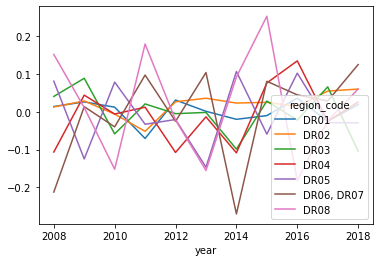

In [29]:
vsb_perc.plot.line()
plt.savefig('sbpc.png')